### ***Capstone Project Module 2: NEW YORK CITY TAXIS AND LIMOUSINES COMMISSION (NYC TLC) TRIP RECORD*** ##
**DATA CLEANING**

**oleh: Athaya Zahrani (JCDS 0408 ON CAMPUS BANDUNG)**

![NYC Taxi](https://publish.purewow.net/wp-content/uploads/sites/2/2018/05/nyc-yellow-taxi-in-times-square-hero.jpg)
![NYC Limousine](https://www.civitatis.com/f/estados-unidos/nueva-york/tour-limusina-nueva-york-589x392.jpg)

*`New York City Taxi and Limousine Commission (TLC)`* adalah sebuah perusahaan/badan yang dibawahi oleh pemerintahan kota New York di Amerika Serikat yang mencakup industri sewa kendaraan, mengatur, serta memfasilitasi Taksi/Limousin yang bisa digunakan untuk warga kota atau wisatawan di kota New York.

NYC TLC didirikan pada tahun 1971 oleh John Lindsay sebagai walikota yang menjabat pada periode tersebut. Perusahaan ini didirikan dengan tujuan untuk memajukan transportasi antar kota.

Pada saat ini, NYC TLC telah memberi sekitar 170.000 lisensi kepada driver profesional, menggunakan 100.000 lebih kendaraan, dan memiliki kurang lebih 1000 pangkalan sewa kendaraan yang tersebar di setiap sudut kota New York. 

Salah satu ciri khas dari taksi ini adalah warnanya yang mencolok yaitu kuning, ini sudah menjadi ciri khas atau ikon kota New York, dan sering dijumpai di beberapa film yang berlatar di New York, seperti Home Alone, Baby's Day Out, Taxi Driver, dan The Irishman.

---

# **A. *Data Understanding***

Sebelum dilakukan analisis data, diperlukan pemahaman terkait data yang tersedia melalui tahapan *Data Understanding*. Pada tahapan ini, ketidakwajaran (anomali) data dapat diidentifikasi yaitu berupa data duplikat, data bernilai *null*, data *typo*, dan sebagainya. Diperlukan justifikasi baik secara *Domain Knowledge* maupun secara statistik dalam mengambil keputusan untuk menangani data-data tersebut.

In [400]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
import geopandas as gpd

## 1. Informasi Umum Dataset

Dataset `NYC TLC Trip Record.csv` berisi rangkuman perjalanan penumpang pada *`NEW YORK CITY TAXIS AND LIMOUSINES COMMISSION TRIP (NYC TLC Trip Record)`* digunakan, dimulai dari data waktu *pick-up* dan *drop-off*, durasi perjalanan, total pembayaran, jenis pembayaran, dan lain-lain. Informasi tersebut disajikan dalam 20 kolom dengan rincian sebagai berikut. Semua pembiayaan dihitung dalam dollar ($).

| No. | Nama Kolom | Deskripsi |
| ---- | --------- | --------- |
| 1. | **VendorID** | Kode yang menunjukkan penyedia LPEP (*Local Physical Entity Provider*) yang menyediakan rekaman perjalanan.|
|||1. Creative Mobile Technologies, LLC.|
|||2. VeriFone Inc. |
| 2. | **lpep_pickup_datetime** |  Tanggal dan waktu saat meteran diaktifkan. |
| 3. | **lpep_dropoff_datetime** | Tanggal dan waktu saat meteran dihentikan. |
| 4. | **store_and_fwd_flag** | Tanda ini menunjukkan apakah catatan perjalanan telah disimpan dalam memori kendaraan sebelum dikirim ke vendor, alias “simpan dan maju (*store and forward*)” karena kendaraannya tidak memiliki koneksi ke server. |
|||Y. Perjalanan *store and forward*|
|||N. Bukan perjalanan *store and forward*|
| 5. | **RateCodeID** | Tujuan akhir perjalanan: |
|||1. Tarif Standar|
|||2. JFK (John F. Kennedy Airport)|
|||3. Newark|
|||4. Nassau atau Westchester|
|||5. Tarif yang dinegosiasikan|
|||6. Berkelompok|
| 6. | **PULocationID** | Zona *Pick-up* NYC TLC dimana taksimeter digunakan. |
| 7. | **DOLocationID** | Zona *Drop-off* NYC TLC dimana taksimeter dihentikan. |
| 8. | **passenger_count** | Jumlah penumpang di dalam kendaraan yang nilainya dimasukkan oleh pengemudi. |
| 9. | **trip_distance** | Jarak perjalanan dalam mil yang dilaporkan oleh taksimeter. |
| 10. | **fare_amount** | Tarif waktu dan jarak yang dihitung oleh meteran. |
| 11. | **extra** | Biaya tambahan pada kondisi tertentu (*Rush hour* atau *Overnight charges*)|
| 12. | **mta_tax** | Pajak $0,50 *Metropolitan Transportation Authority* (MTA) adalah pajak yang dipicu secara otomatis pada tingkat meteran yang sedang digunakan, yang dikenakan di wilayah-wilayah tertentu di New York State, Amerika Serikat. |
| 13. | **tip_amount** | Pembayaran tips yang secara otomatis terisi untuk kartu kredit. Tidak termasuk *cash* tips. |
| 14. | **tolls_amount** | Pembayaran tol yang dibayarkan dalam perjalanan. |
| 15. | **ehail_fee** | Biaya tambahan yang dikenakan oleh layanan transportasi seperti taksi atau mobil berbasis aplikasi (*ride-sharing services*) ketika pengguna memesan atau menggunakan layanan tersebut melalui *platform* online atau aplikasi ponsel. |
| 16. | **improvement_surcharge** | Biaya tambahan sebesar 0,30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015. |
| 17. | **total_amount** | Jumlah total yang dibebankan kepada penumpang (fare_amount + extra + mta_tax + tip_amount + tolls_amount). Tidak termasuk *cash* tips. |
| 18. | **payment_type** | Sebuah angka yang menunjukkan cara penumpang membayar biaya perjalanan.|
|||1. Kartu Kredit|
|||2. Uang Tunai|
|||3. Tanpa Biaya|
|||4. Sengketa|
|||5. Tidak diketahui|
|||6. Perjalanan yang dibatalkan|
| 19. | **trip_type** | Kode perjalanan yang dapat diubah oleh pihak pengemudi.|
|||1. *Street-hail* (Istilah yang digunakan dalam industri transportasi untuk merujuk pada proses memesan atau menaiki taksi atau kendaraan umum lainnya langsung dari jalan atau trotoar, tanpa perlu melakukan pemesanan sebelumnya melalui telepon atau aplikasi.)|
|||2. *Dispatch* (Pengiriman barang atau layanan)|
| 20. | **congestion_surcharge** | Biaya kompensasi akibat kemacetan di suatu area atau jalur tertentu. | 

Berikut adalah 5 baris teratas, terbawah, dan sampel acak dari dataset *NYC TLC Trip Record*.

In [401]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(), df.tail(), df.sample(5))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17740\1236443675.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1/1/2023 0:26,1/1/2023 0:37,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,1/1/2023 0:51,1/1/2023 0:57,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,1/1/2023 0:35,1/1/2023 0:41,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,1/1/2023 0:13,1/1/2023 0:19,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,1/1/2023 0:33,1/1/2023 0:39,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,1/31/2023 22:29,1/31/2023 22:42,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,1/31/2023 22:40,1/31/2023 22:48,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,1/31/2023 23:46,2/1/2023 0:02,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,1/31/2023 23:01,1/31/2023 23:19,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,1/31/2023 23:51,2/1/2023 0:07,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
14883,2,1/8/2023 18:59,1/8/2023 19:05,N,1.0,74,42,1.0,0.90,7.90,0.0,0.5,1.88,0.0,NaN,1.0,11.28,1.0,1.0,0.00
17392,2,1/10/2023 4:13,1/10/2023 4:53,N,1.0,82,138,1.0,3.89,17.70,6.0,0.5,0.00,0.0,NaN,1.0,25.20,1.0,1.0,0.00
28328,2,1/14/2023 21:10,1/14/2023 21:10,N,5.0,75,75,2.0,6.88,50.00,0.0,0.0,0.00,0.0,NaN,1.0,51.00,1.0,2.0,0.00
64167,2,1/3/2023 5:46,1/3/2023 5:59,NaN,NaN,74,162,NaN,3.81,19.39,0.0,0.0,0.00,0.0,NaN,1.0,23.14,NaN,NaN,NaN
43436,2,1/22/2023 14:36,1/22/2023 14:47,N,1.0,74,238,1.0,3.06,15.60,0.0,0.5,3.97,0.0,NaN,1.0,23.82,1.0,1.0,2.75


In [402]:
print('Jumlah dimensi: ', df.ndim)
print('Bentuk data: ', df.shape)
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
print('Index yang dimiliki: ', df.index)
print('Kolom yang dimiliki: ', df.columns)

Jumlah dimensi:  2
Bentuk data:  (68211, 20)
Jumlah baris: 68211
Jumlah kolom: 20
Index yang dimiliki:  RangeIndex(start=0, stop=68211, step=1)
Kolom yang dimiliki:  Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

## 2. *Supporting Dataset*

| No. | Nama Kolom | Deskripsi |
| ---- | --------- | --------- |
| 1. | **OBJECTID** | Kode ID yang menunjukkan Zona Area di New York City.|
| 2. | **Shape_Leng** | Panjang perimeter atau keliling dari objek geospasial (poligon).|
| 3. | **Shape_Area** | Luas  objek geospasial (poligon) dalam unit persegi. Biasanya menunjukkan luas masing-masing wilayah.|
| 4. | **zone** | Zona tertentu di New York City.|
| 5. | **LocationID** | ID lokasi yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.|
| 6. | **borough** | Sektor-sektor yang ada di New York City.|
| 7. | **longitude** | Garis lintang.|
| 8. | **latitude** | Garis bujur.|

In [404]:
location = pd.read_csv('location.csv')
display(location.head(), location.tail(), location.sample(5))

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
266,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,1.023971e+06,266866.032718
267,260,0.133514,0.000422,Woodside,260,Queens,1.010063e+06,211298.529136
268,261,0.027120,0.000034,World Trade Center,261,Manhattan,9.807446e+05,197628.272456
269,262,0.049064,0.000122,Yorkville East,262,Manhattan,9.994435e+05,222247.381595
270,263,0.037017,0.000066,Yorkville West,263,Manhattan,9.978183e+05,223006.185937


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
222,215,0.103556,0.000396,South Jamaica,215,Queens,1.041846e+06,192257.626160
89,88,0.035205,0.000057,Financial District South,88,Manhattan,9.811971e+05,195500.411846
141,134,0.069588,0.000202,Kew Gardens,134,Queens,1.031450e+06,197517.714791
236,229,0.042525,0.000095,Sutton Place/Turtle Bay North,229,Manhattan,9.939472e+05,214918.735132
162,155,0.169808,0.000868,Marine Park/Mill Basin,155,Brooklyn,1.007222e+06,164368.373647


In [405]:
print('Jumlah dimensi: ', location.ndim)
print('Bentuk data: ', location.shape)
print(f'Jumlah baris: {location.shape[0]}')
print(f'Jumlah kolom: {location.shape[1]}')
print('Index yang dimiliki: ', location.index)
print('Kolom yang dimiliki: ', location.columns)

Jumlah dimensi:  2
Bentuk data:  (271, 8)
Jumlah baris: 271
Jumlah kolom: 8
Index yang dimiliki:  RangeIndex(start=0, stop=271, step=1)
Kolom yang dimiliki:  Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'longitude', 'latitude'],
      dtype='object')


In [406]:
location.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    271 non-null    int64  
 1   Shape_Leng  271 non-null    float64
 2   Shape_Area  271 non-null    float64
 3   zone        271 non-null    object 
 4   LocationID  271 non-null    int64  
 5   borough     271 non-null    object 
 6   longitude   271 non-null    float64
 7   latitude    271 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 17.1+ KB


In [407]:
pd.DataFrame({
    'kolom': location.columns.values,
    'data_type': location.dtypes.values,
    'null_value(%)': location.isna().mean().values * 100,
    'negative_value(%)': [len(location[col][location[col] < 0]) / len(location) * 100 if col in location.select_dtypes(include=[np.number]).columns else 0 for col in location.columns],
    '0_value(%)': [len(location[col][location[col] == 0]) / len(location) * 100 if col in location.select_dtypes(include=[np.number]).columns else 0 for col in location.columns],
    'duplicate' : location.duplicated().sum(),
    'n_unique': location.nunique().values,
    'sample_unique': [location[col].unique() for col in location.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,OBJECTID,int64,0.0,0.0,0.0,0,263,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Shape_Leng,float64,0.0,0.0,0.0,0,263,"[0.116357453189, 0.43346966679, 0.084341105901..."
2,Shape_Area,float64,0.0,0.0,0.0,0,263,"[0.0007823067885, 0.00486634037837, 0.00031441..."
3,zone,object,0.0,0.0,0.0,0,260,"[Newark Airport, Jamaica Bay, Allerton/Pelham ..."
4,LocationID,int64,0.0,0.0,0.0,0,260,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
5,borough,object,0.0,0.0,0.0,0,6,"[EWR, Queens, Bronx, Manhattan, Staten Island,..."
6,longitude,float64,0.0,0.0,0.0,0,263,"[936681.7498053048, 1033536.0827942044, 102713..."
7,latitude,float64,0.0,0.0,0.0,0,263,"[190522.13027768556, 161853.98229982704, 25473..."


> Berdasarkan informasi umum tabel *supporting dataset*, dapat disimpulkan bahwa **dataset sudah bersih dan akan digabungkan dengan dataset utama untuk menampilkan informasi lebih lengkap terkait kolom `PULocationID` dan `DOLocationID`**.

## 3. Deskripsi Statistik Kolom Numerikal

In [408]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


## 4. Deskripsi Statistik Kolom Kategorikal

In [409]:
df.describe(include='object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,29448,29624,2
top,1/13/2023 18:15,1/6/2023 18:20,N
freq,12,13,63579


## 5. *Skimming Dataset* 

In [410]:
pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0.000,0.000,0,29448,"[1/1/2023 0:26, 1/1/2023 0:51, 1/1/2023 0:35, ..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,29624,"[1/1/2023 0:37, 1/1/2023 0:57, 1/1/2023 0:41, ..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Berdasarkan poin 1 - 4, dapat disimpulkan bahwa:
* Dataset memiliki 68211 baris dan 20 kolom
* Dataset tidak memiliki data yang duplikat
* Kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge` memiliki data kosong. Data kosong tersebut diwakili dengan data yang bertuliskan "nan" dan akan dianalisis di tahap selanjutnya.
* Tidak ada satupun data pada kolom `ehail_fee`, maka pada proses selanjutnya kolom ini akan dihapus.
* Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data *object*, tipe data ini perlu diubah ke *date time* sesuai dengan jenis datanya untuk mempermudah proses analisis.
* Pada kolom `RatecodeID` terdapat data bernilai 99 sebagai data yang tidak seharusnya.
* Terdapat data bernilai negatif pada kolom `fare_amount, extra, mta_tax, tip_amount, improvement_surcharge, total_amount, dan congestion_surcharge`.
* Terdapat data bernilai nol pada kolom `passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, dan congestion_surcharge`.
* Terdapat banyak kolom yang berhubungan dengan biaya, akan dibuat kolom baru bernama `biaya final` sebagai penjumlahan antara total amount (fare_amount + extra + mta_tax + tip_amount + tolls_amount), improvement_surcharge, dan congestion_surcharge  untuk mengetahui biaya akhir yang perlu dikeluarkan oleh penumpang.

## 6. *Missing Value*

In [411]:
# Cek jumlah missing value pada tiap kolom
print('Jumlah missing value pada tiap kolom: ')
df.isna().sum()

Jumlah missing value pada tiap kolom: 


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [412]:
# Persentase missing value pada tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

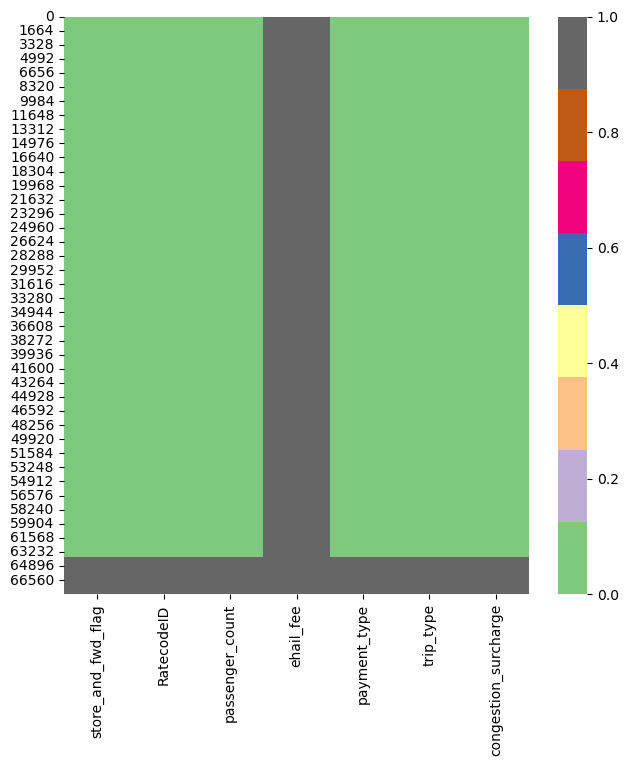

In [413]:
# Sebaran missing value pada tiap kolom yang mengandung missing value
plt.figure(figsize=(7.5, 7.5))
sns.heatmap(df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge']].isna(), cmap = 'Accent')
plt.show()

In [414]:
# Cek index missing value pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge

list = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge']
index_nan = []
for index, row in df.iterrows():
    if pd.isna(row['store_and_fwd_flag']):
        index_nan.append(index)

print('Missing value pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge:')
print(f'Missing value pertama pada index: {index_nan[0]}')
print(f'Missing value terakhir pada index: {index_nan[-1]}')
print(f'Jumlah missing value: {len(index_nan)} baris')

# Missing value pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge memiliki index pertama, index terakhir, dan jumlah yang sama

Missing value pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge:
Missing value pertama pada index: 63887
Missing value terakhir pada index: 68210
Jumlah missing value: 4324 baris


In [415]:
# Cek index missing value pada kolom trip_type
index_nan = []
for index, row in df.iterrows():
    if pd.isna(row['trip_type']):
        index_nan.append(index)

print(f'Missing value pertama pada index: {index_nan[0]}')
print(f'Missing value terakhir pada index: {index_nan[-1]}')
print(f'Jumlah missing value: {len(index_nan)} baris')
print(f'Index keseluruhan: {index_nan}')
print(f'Index acak: {index_nan[0:10]}')
print(f'Index berurut: {index_nan[10::]}')

# 10 missing value pertama pada kolom trip_type berindex acak, sedangkan selanjutnya berada di index yang sama seperti pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge

Missing value pertama pada index: 1084
Missing value terakhir pada index: 68210
Jumlah missing value: 4334 baris
Index keseluruhan: [1084, 2174, 9055, 14125, 29143, 29711, 35975, 37691, 42432, 45204, 63887, 63888, 63889, 63890, 63891, 63892, 63893, 63894, 63895, 63896, 63897, 63898, 63899, 63900, 63901, 63902, 63903, 63904, 63905, 63906, 63907, 63908, 63909, 63910, 63911, 63912, 63913, 63914, 63915, 63916, 63917, 63918, 63919, 63920, 63921, 63922, 63923, 63924, 63925, 63926, 63927, 63928, 63929, 63930, 63931, 63932, 63933, 63934, 63935, 63936, 63937, 63938, 63939, 63940, 63941, 63942, 63943, 63944, 63945, 63946, 63947, 63948, 63949, 63950, 63951, 63952, 63953, 63954, 63955, 63956, 63957, 63958, 63959, 63960, 63961, 63962, 63963, 63964, 63965, 63966, 63967, 63968, 63969, 63970, 63971, 63972, 63973, 63974, 63975, 63976, 63977, 63978, 63979, 63980, 63981, 63982, 63983, 63984, 63985, 63986, 63987, 63988, 63989, 63990, 63991, 63992, 63993, 63994, 63995, 63996, 63997, 63998, 63999, 64000, 64

In [416]:
# Cek index missing value pada kolom ehail_fee
index_nan = []
for index, row in df.iterrows():
    if pd.isna(row['ehail_fee']):
        index_nan.append(index)

print(f'Missing value pertama pada index: {index_nan[0]}')
print(f'Missing value terakhir pada index: {index_nan[-1]}')
print(f'Jumlah missing value: {len(index_nan)} baris')

# Kolom ehail_fee terbukti kosong karena missing value terletak dari index pertama sampai terakhir

Missing value pertama pada index: 0
Missing value terakhir pada index: 68210
Jumlah missing value: 68211 baris


## 7. *Outlier*

In [417]:
# Jumlah outlier dan persentasenya pada tiap kolom numerikal
kolom_numerikal = df.describe().columns
tabel_outlier = pd.DataFrame(columns = ['Median' , 'Batas Bawah' , 'Batas Atas' , 'Jumlah Outlier' , 'Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1 = df[kolom].quantile(0.25)
    Q2 = df[kolom].quantile(0.5)
    Q3 = df[kolom].quantile(0.75)
    batas_atas = Q3 + 1.5 * (Q3 - Q1)
    batas_bawah = Q1 - 1.5 * (Q3 - Q1)
    tabel_outlier.loc[kolom] = [df[kolom].median(), batas_bawah, batas_atas, len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]), len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]) / len(df) * 100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
VendorID,2.00,2.00,2.00,9343.0,13.70
RatecodeID,1.00,1.00,1.00,1784.0,2.62
PULocationID,75.00,-8.50,211.50,6133.0,8.99
DOLocationID,138.00,-143.50,436.50,0.0,0.00
passenger_count,1.00,1.00,1.00,9588.0,14.06
trip_distance,1.85,-2.04,6.36,5774.0,8.46
fare_amount,13.50,-6.45,35.55,4339.0,6.36
extra,0.00,-1.50,2.50,3586.0,5.26
mta_tax,0.50,0.50,0.50,15034.0,22.04
tip_amount,1.60,-5.00,8.32,2045.0,3.00


Berdasarkan poin 5 dan 6, dapat disimpulkan bahwa:
* Dataset memiliki *missing value* pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, dan `congestion_surcharge`.
* *Missing value* pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, dan `congestion_surcharge` memiliki index pertama, index terakhir, dan jumlah yang sama.
* 10 *missing value* pertama pada kolom `trip_type` berindex acak, sedangkan selanjutnya berada di index yang sama seperti pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, dan congestion_surcharge.
* Kolom `ehail_fee` terbukti kosong karena *missing value* terletak dari index pertama sampai terakhir.
* Kolom `mta_tax` memiliki persentase outlier terbanyak yaitu sebesar `22.02%` diikuti dengan kolom `passenger_count` sebesar `14.06%`, dan kolom `VendorID` sebesar `13.70%` dari total keseluruhan data.
* Kolom `DOLocationID`, `ehail_fee`, dan `congestion_surcharge` tidak memiliki *outlier*.
* **Penanganan dari seluruh aspek pada bagian *data unserstanding* akan dibahas di bagian *Data Cleaning*.**

---

# **B. *Data Cleaning***

> Berdasarkan informasi tipe data, kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` seharusnya disimpan dalam format *datetime*

In [418]:
# Mengubah tipe data menjadi datetime

import datetime as dt
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [419]:
# Kolom lpep_pickup_datetime dan lpep_dropoff_datetime sudah disimpan dalam format datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

> Drop kolom `ehail_fee` karena kolom tidak memiliki data satupun

In [420]:
df = df.drop(columns=['ehail_fee'])

In [421]:
# Kolom ehail_fee sudah terhapus
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

## 1. *Zero Values Handling*

In [422]:
# Cek kolom yang memiliki nilai nol
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value (%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,column,data_type,0_value (%)
0,VendorID,int64,0.000
1,lpep_pickup_datetime,datetime64[ns],0.000
2,lpep_dropoff_datetime,datetime64[ns],0.000
3,store_and_fwd_flag,object,0.000
4,RatecodeID,float64,0.000
5,PULocationID,int64,0.000
6,DOLocationID,int64,0.000
7,passenger_count,float64,0.493
8,trip_distance,float64,4.911
9,fare_amount,float64,0.122


Berdasarkan tabel di atas, dapat disimpulkan bahwa:
1. Kolom `passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount`, dan `congestion_surcharge` memiliki data yang bernilai 0, selainnya tidak.
2. Kolom `passenger_count, trip_distance, fare_amount`, dan `total_amount` tidak mungkin bernilai 0, sehingga perlu dilakukan penanganan khusus pada data tersebut.
3. Kolom `extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge`, dan `congestion_surcharge` memungkinkan bernilai 0 karena penambahan biaya tersebut berdasarkan kondisi perjalanan dan penumpang, sehingga data dapat dibiarkan.

In [423]:
# Penanganan data pada kolom passenger_count dan trip_distance yang bernilai 0
df[(df['passenger_count'] == 0) & (df['trip_distance'] == 0)].sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
21948,2,2023-01-12 07:53:00,2023-01-12 07:53:00,N,5.0,242,242,0.0,0.0,10.0,0.0,0.0,2.20,0.0,1.0,13.20,1.0,2.0,0.0
49433,1,2023-01-25 11:51:00,2023-01-25 11:51:00,N,1.0,145,145,0.0,0.0,3.0,0.0,1.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0
49432,1,2023-01-25 11:50:00,2023-01-25 11:50:00,N,1.0,145,145,0.0,0.0,3.0,0.0,1.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0
59887,1,2023-01-30 08:42:00,2023-01-30 08:42:00,N,1.0,226,226,0.0,0.0,3.0,0.0,1.5,5.50,0.0,1.0,10.00,1.0,1.0,0.0
42907,2,2023-01-22 06:43:00,2023-01-22 06:43:00,N,5.0,250,264,0.0,0.0,8.0,0.0,0.0,5.08,0.0,1.0,14.08,1.0,2.0,0.0


In [424]:
len(df[(df['passenger_count'] == 0) & (df['trip_distance'] == 0)])

38

> Terdapat 38 kolom data dengan `passenger_count dan trip_distance bernilai 0`, dengan tidak ada jarak waktu antara lpep_pickup_datetime dan lpep_dropoff_datetime, yang memungkinkan terjadinya pembatalan trip. Drop kolom dengan pembatalan trip:

In [425]:
df = df[~((df['passenger_count'] == 0) & (df['trip_distance'] == 0))]

In [426]:
# Penanganan data pada kolom passenger_count dan total_amount yang bernilai 0
df[(df['passenger_count'] == 0) & (df['total_amount'] == 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
53542,1,2023-01-26 20:35:00,2023-01-26 21:44:00,N,5.0,10,10,0.0,20.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


> Terdapat 1 kolom data dengan `passenger_count dan total_amount bernilai 0`, yang memungkinkan terjadinya pembatalan trip. Drop kolom dengan pembatalan trip:

In [427]:
df = df[~((df['passenger_count'] == 0) & (df['total_amount'] == 0))]

In [428]:
# Penanganan data pada kolom passenger_count yang bernilai 0
df[df['passenger_count'] == 0].sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
52677,1,2023-01-26 16:39:00,2023-01-26 17:36:00,N,1.0,75,17,0.0,9.6,52.0,5.25,1.5,0.00,0.0,1.0,58.75,2.0,1.0,2.75
29213,1,2023-01-15 14:07:00,2023-01-15 14:13:00,N,1.0,41,42,0.0,0.8,7.2,0.00,1.5,0.50,0.0,1.0,9.20,1.0,1.0,0.00
39638,1,2023-01-20 16:54:00,2023-01-20 16:57:00,N,1.0,75,236,0.0,0.5,5.1,5.25,1.5,2.35,0.0,1.0,14.20,1.0,1.0,2.75
25206,1,2023-01-13 15:09:00,2023-01-13 15:15:00,N,1.0,75,75,0.0,0.9,7.2,0.00,1.5,1.70,0.0,1.0,10.40,1.0,1.0,0.00
8291,1,2023-01-05 16:41:00,2023-01-05 16:48:00,N,1.0,75,74,0.0,1.5,8.6,2.50,1.5,1.00,0.0,1.0,13.60,1.0,1.0,0.00


In [429]:
len(df[df['passenger_count'] == 0])

297

> Karena tersisa kolom `passenger_count yang bernilai 0` tetapi memiliki info lengkap minimal pada kolom trip_distance dan total_amount, serta adanya rentang waktu antara lpep_pickup_datetime dan lpep_dropoff_datetime, maka memungkinkan terjadinya trip dengan minimal ada 1 passenger. Terdapat 297 kolom data dengan passenger_count bernilai 0. Mengganti jumlah passenger menjadi 1:

In [430]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)

In [431]:
# Penanganan data pada kolom trip_distance, fare_amount, dan total_amount 
# dengan melakukan seleksi trip_distance > 0, fare_amount > 0, dan total_amount > 0.
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]
df = df[df['total_amount']>0]

In [432]:
# Cek kembali kolom yang memiliki nilai nol
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value (%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,column,data_type,0_value (%)
0,VendorID,int64,0.000
1,lpep_pickup_datetime,datetime64[ns],0.000
2,lpep_dropoff_datetime,datetime64[ns],0.000
3,store_and_fwd_flag,object,0.000
4,RatecodeID,float64,0.000
5,PULocationID,int64,0.000
6,DOLocationID,int64,0.000
7,passenger_count,float64,0.000
8,trip_distance,float64,0.000
9,fare_amount,float64,0.000


> Kolom `passenger_count, trip_distance, fare_amount`, dan `total_amount` yang tidak mungkin bernilai 0 sudah ditangani.

## 2. *Missing Values Handling* 

Terdapat *missing value* pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge`

***Missing Value Handling* pada kolom `store_and_fwd_flag`**

In [433]:
# Cek kategori data pada kolom store_and_fwd_flag
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    60325
Y      244
Name: count, dtype: int64

In [434]:
df['store_and_fwd_flag'].value_counts(normalize = True) 

store_and_fwd_flag
N    0.995972
Y    0.004028
Name: proportion, dtype: float64

> Terlihat bahwa catatan perjalan yang tidak bersifat *store and forward* memiliki jumlah terbanyak. Buktikan dengan mengecek modusnya:

In [435]:
import statistics

statistics.mode(df['store_and_fwd_flag'])

'N'

> Isi missing value pada kolom store_and_fwd_flag menggunakan modusnya (N).

In [436]:
df['store_and_fwd_flag'].fillna('N', inplace=True)

In [437]:
df['store_and_fwd_flag'].isna().sum()

0

***Missing Value Handling* pada kolom `RatecodeID`**

In [438]:
# Cek RatecodeID berdasarkan jenis tujuan akhir perjalanan 
df['RatecodeID'].value_counts()

RatecodeID
1.0     59400
5.0       955
2.0       131
4.0        53
3.0        20
99.0       10
Name: count, dtype: int64

In [439]:
df['RatecodeID'].value_counts(normalize = True)

RatecodeID
1.0     0.980700
5.0     0.015767
2.0     0.002163
4.0     0.000875
3.0     0.000330
99.0    0.000165
Name: proportion, dtype: float64

> Terlihat bahwa tujuan akhir perjalanan dengan kode 1 (tarif standar) pada RatecodeID memiliki jumlah terbanyak. Buktikan dengan mengecek mediannya:

In [440]:
df['RatecodeID'].median()

1.0

> Dapat disimpulkan bahwa `penanganan missing_value pada kolom RatecodeID bisa diisi menggunakan median`. Hal ini dipertimbangkan karena kolom tersebut tidak berdistribusi normal. Pembuktian distribusi data tidak normal:

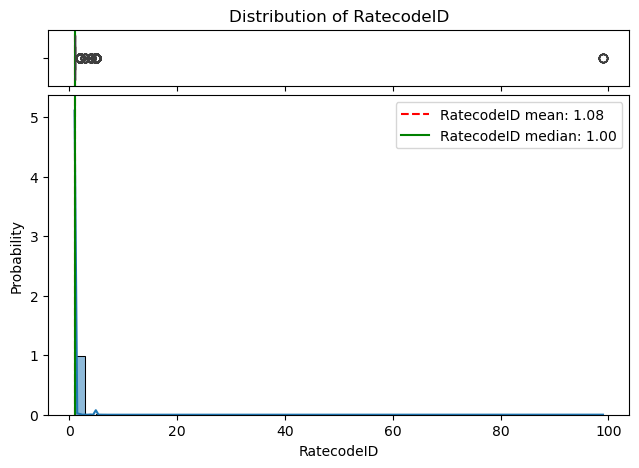

In [441]:
import numpy as np
from scipy.stats import normaltest

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5),
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

pvalue = normaltest(df['RatecodeID'])[1]
mean = df['RatecodeID'].mean()
median = df['RatecodeID'].median()

ax1.set_title(f"Distribution of RatecodeID")
sns.boxplot(x = df['RatecodeID'], ax = ax1)
ax1.axvline(df['RatecodeID'].mean(), color='r', linestyle='--')
ax1.axvline(df['RatecodeID'].median(), color='g', linestyle='-')
ax1.set(xlabel = "")
sns.histplot(data = df['RatecodeID'], ax = ax2, stat = "probability", kde=True, bins=50)
ax2.axvline(df['RatecodeID'].mean(), color='r', linestyle='--', label=f'RatecodeID mean: {mean:.2f}')
ax2.axvline(df['RatecodeID'].median(), color='g', linestyle='-', label=f'RatecodeID median: {median:.2f}')
plt.legend()
plt.show()

> Berdasarkan gambar di atas, terlihat bahwa distribusi data pada kolom RatecodeID tidak normal. Lanjut mengisi *missing value* menggunakan kode 1:

In [442]:
df['RatecodeID'].fillna(1, inplace=True)

In [443]:
df['RatecodeID'].isna().sum()

0

***Missing Value Handling* pada kolom `passenger_count`**

In [444]:
# Cek kategori data pada kolom passenger_count
df['passenger_count'].value_counts()

passenger_count
1.0    51614
2.0     4903
5.0     1751
6.0     1035
3.0      904
4.0      359
7.0        2
8.0        1
Name: count, dtype: int64

In [445]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1.0    0.852152
2.0    0.080949
5.0    0.028909
6.0    0.017088
3.0    0.014925
4.0    0.005927
7.0    0.000033
8.0    0.000017
Name: proportion, dtype: float64

> Terlihat bahwa jumlah penumpang sebanyak 1 orang memiliki jumlah terbanyak. Buktikan dengan mengecek mediannya:

In [446]:
df['passenger_count'].median()

1.0

> Dapat disimpulkan bahwa `penanganan missing value pada kolom passenger_count bisa diisi menggunakan median`. Hal ini dipertimbangkan karena kolom tersebut tidak berdistribusi normal. Pembuktian distribusi data tidak normal:

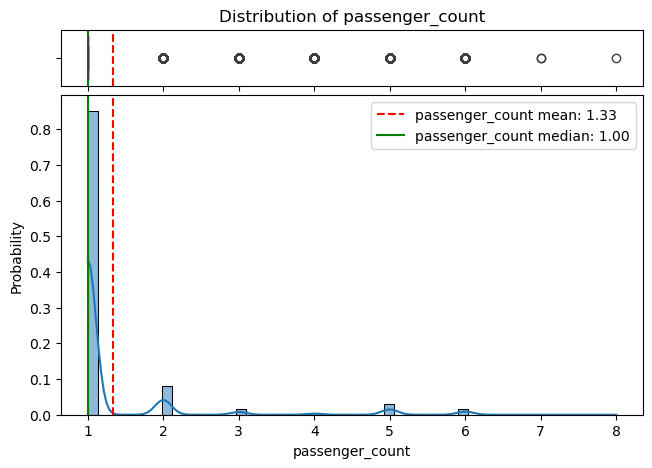

In [447]:
from scipy.stats import normaltest

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5),
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

pvalue = normaltest(df['passenger_count'])[1]
mean = df['passenger_count'].mean()
median = df['passenger_count'].median()

ax1.set_title(f"Distribution of passenger_count")
sns.boxplot(x = df['passenger_count'], ax = ax1)
ax1.axvline(df['passenger_count'].mean(), color='r', linestyle='--')
ax1.axvline(df['passenger_count'].median(), color='g', linestyle='-')
ax1.set(xlabel = "")
sns.histplot(data = df['passenger_count'], ax = ax2, stat = "probability", kde=True, bins=50)
ax2.axvline(df['passenger_count'].mean(), color='r', linestyle='--', label=f'passenger_count mean: {mean:.2f}')
ax2.axvline(df['passenger_count'].median(), color='g', linestyle='-', label=f'passenger_count median: {median:.2f}')
plt.legend()
plt.show()

> Berdasarkan gambar di atas, terlihat bahwa distribusi data pada kolom passenger_count tidak normal. Lanjut mengisi *missing value* dengan jumlah penumpang sebanyak 1 orang:

In [448]:
df['passenger_count'].fillna(1, inplace=True)

In [449]:
df['passenger_count'].isna().sum()

0

***Missing Value Handling* pada kolom `payment_type`**

In [450]:
# Cek kesesuaian data pada kolom payment_type
df['payment_type'].value_counts()

payment_type
1.0    38444
2.0    21851
3.0      225
4.0       49
Name: count, dtype: int64

In [451]:
df['payment_type'].value_counts(normalize = True)

payment_type
1.0    0.634714
2.0    0.360762
3.0    0.003715
4.0    0.000809
Name: proportion, dtype: float64

> Semua data pada kolom payment_type sudah sesuai (`tidak ada data selain angka 1 - 6` sebagai kode cara penumpang membayar trip)

> Berdasarkan deskripsi kolom `tip_amount`, pembayaran tips secara otomatis terisi jika penumpang membayar menggunakan kartu kredit. Oleh karena itu, dapat disimpulkan bahwa `jika tips > 0, maka metode yang digunakan adalah kartu kredit (kode 1 pada kolom payment_type)`. Cek argumen tersebut pada dataset:

In [452]:
df[df['tip_amount'] > 0]['payment_type'].value_counts().to_frame()

,count
payment_type,
1.0,34834
2.0,1


In [453]:
df[(df['tip_amount'] > 0) & (df['payment_type'] == 2)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
38207,1,2023-01-19 21:12:00,2023-01-19 21:25:00,N,1.0,74,237,1.0,2.7,15.6,3.75,1.5,5.0,0.0,1.0,25.85,2.0,1.0,2.75


> `Terdapat satu baris yang tidak sesuai`, yaitu tip_amount > 0, tetapi menggunakan payment_type kode 2 (uang tunai). Ganti payment_type menjadi 1:

In [454]:
df.loc[(df['tip_amount'] > 0) & (df['payment_type'] == 2), 'payment_type'] == 1

38207    False
Name: payment_type, dtype: bool

> Selanjutnya adalah pengisian *missing value* pada kolom payment_type dengan tip_amount > 0 menggunakan kode 1 (karena membayar menggunakan kartu kredit), dan selainnya menggunakan kode 5 (pembayaran tidak diketahui).

In [455]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)

In [456]:
# Cek ulang kesesuaian data 
df['payment_type'].value_counts()

payment_type
1.0    42169
2.0    21851
5.0      441
3.0      225
4.0       49
Name: count, dtype: int64

In [457]:
df['payment_type'].isna().sum()

0

***Missing Value Handling* pada kolom `trip_type`**

In [458]:
# Menghitung korelasi
df['trip_type'].corr(df['RatecodeID'], method = 'pearson')

0.9156725837161559

In [459]:
# Cek korelasi kolom trip_type dengan kolom lainnya
list = ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'congestion_surcharge']
for i in list:
    hasil = df['trip_type'].corr(df[i], method = 'pearson')
    print(f'Korelasi trip_type dengan {i} sebesar {hasil:.3f}')

Korelasi trip_type dengan VendorID sebesar 0.034
Korelasi trip_type dengan lpep_pickup_datetime sebesar 0.000
Korelasi trip_type dengan lpep_dropoff_datetime sebesar 0.000
Korelasi trip_type dengan RatecodeID sebesar 0.916
Korelasi trip_type dengan PULocationID sebesar 0.042
Korelasi trip_type dengan DOLocationID sebesar 0.005
Korelasi trip_type dengan passenger_count sebesar 0.003
Korelasi trip_type dengan trip_distance sebesar 0.023
Korelasi trip_type dengan fare_amount sebesar 0.150
Korelasi trip_type dengan extra sebesar -0.067
Korelasi trip_type dengan mta_tax sebesar -0.215
Korelasi trip_type dengan tip_amount sebesar 0.023
Korelasi trip_type dengan tolls_amount sebesar 0.026
Korelasi trip_type dengan improvement_surcharge sebesar -0.084
Korelasi trip_type dengan total_amount sebesar 0.121
Korelasi trip_type dengan payment_type sebesar -0.012
Korelasi trip_type dengan congestion_surcharge sebesar -0.043


> Berdasarkan perhitungan korelasi, terlihat bahwa `kolom trip_type memiliki korelasi sangat kuat sebesar 0.916 dengan kolom RatecodeID`, yang berarti kolom trip_type sangat dipengaruhi oleh kolom RatecodeID. Oleh karena itu, kita bisa mengisi *missing value* pada kolom trip_type berdasarkan nilai RatecodeID-nya.

In [460]:
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        59398
           2.0            2
2.0        1.0          131
3.0        1.0           20
4.0        1.0           51
           2.0            2
5.0        1.0          115
           2.0          840

> Berdasarkan tabel di atas, mayoritas RatecodeID 1.0 memiliki trip_type 1.0. Oleh karena itu, *missing value* pada kolom trip_type yang memiliki nilai RatecodeID 1.0 bisa diisi 1.0.

In [461]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total = ('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4166
99.0,10


> Terlihat bahwa semua *missing value* pada kolom trip_type memiliki RatecodeID bernilai 1.0.

In [462]:
df['trip_type'].fillna(1, inplace = True)

In [463]:
df['trip_type'].isna().sum()

0

***Missing Value Handling* pada kolom `congestion_surcharge`**

In [464]:
# Cek kategori data pada kolom kongestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.00    43839
2.75    16714
2.50       16
Name: count, dtype: int64

In [465]:
df['congestion_surcharge'].value_counts(normalize = True)

congestion_surcharge
0.00    0.723786
2.75    0.275950
2.50    0.000264
Name: proportion, dtype: float64

> Terlihat bahwa penumpang yang tidak dibebankan biaya kompensasi congestion_surcharge memiliki jumlah terbanyak. Buktikan dengan mengecek mediannya:

In [466]:
df['congestion_surcharge'].median()

0.0

> Dapat disimpulkan bahwa `penanganan missing value pada kolom congestion_surcharge bisa diisi menggunakan median` dan diasumsikan bahwa penumpang tidak dibebankan biaya kompensasi. Hal ini dipertimbangkan karena kolom tersebut tidak berdistribusi normal. Pembuktian distribusi data tidak normal:

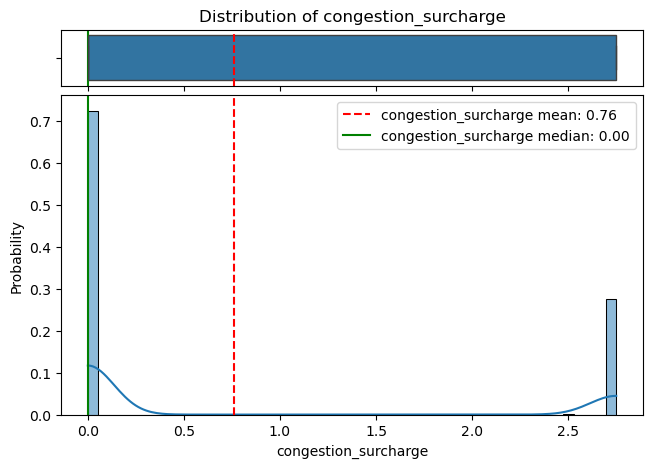

In [467]:
from scipy.stats import normaltest

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5),
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

pvalue = normaltest(df['congestion_surcharge'])[1]
mean = df['congestion_surcharge'].mean()
median = df['congestion_surcharge'].median()

ax1.set_title(f"Distribution of congestion_surcharge")
sns.boxplot(x = df['congestion_surcharge'], ax = ax1)
ax1.axvline(df['congestion_surcharge'].mean(), color='r', linestyle='--')
ax1.axvline(df['congestion_surcharge'].median(), color='g', linestyle='-')
ax1.set(xlabel = "")
sns.histplot(data = df['congestion_surcharge'], ax = ax2, stat = "probability", kde=True, bins=50)
ax2.axvline(df['congestion_surcharge'].mean(), color='r', linestyle='--', label=f'congestion_surcharge mean: {mean:.2f}')
ax2.axvline(df['congestion_surcharge'].median(), color='g', linestyle='-', label=f'congestion_surcharge median: {median:.2f}')
plt.legend()
plt.show()

> Berdasarkan gambar di atas, terlihat bahwa distribusi data pada kolom congestion_surcharge tidak normal. Lanjut mengisi *missing value* dengan 0.


In [468]:
df['congestion_surcharge'].fillna(0, inplace=True)

In [469]:
df['congestion_surcharge'].isna().sum()

0

In [470]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100
}).round(3)

,feature,data_type,null_value(%)
0,VendorID,int64,0.0
1,lpep_pickup_datetime,datetime64[ns],0.0
2,lpep_dropoff_datetime,datetime64[ns],0.0
3,store_and_fwd_flag,object,0.0
4,RatecodeID,float64,0.0
5,PULocationID,int64,0.0
6,DOLocationID,int64,0.0
7,passenger_count,float64,0.0
8,trip_distance,float64,0.0
9,fare_amount,float64,0.0


> Sudah tidak ada *missing value* pada seluruh data

## 3. *Outliers Handling*

Berdasarkan informasi *outlier* pada bagian *Data Understanding*, semua data memiliki *outlier* kecuali pada kolom `DOLocationID` dan `congestion_surcharge`.

***Outliers Handling* pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`**

In [471]:
# Cek tahun berdasarkan jumlahnya
df['lpep_pickup_datetime'].dt.year.value_counts().to_frame()

,count
lpep_pickup_datetime,
2023,64732
2022,2
2009,1


> *Outlier* terletak pada data dengan tahun 2022 dan 2009

In [472]:
# Cek bulan berdasarkan jumlahnya
df['lpep_pickup_datetime'].dt.month.value_counts().to_frame()

,count
lpep_pickup_datetime,
1,64732
12,2
2,1


> *Outlier* terletak pada data dengan bulan 12 (Desember) dan 2 (Februari)

In [473]:
df['lpep_pickup_datetime'].dt.day.value_counts().to_frame().sort_index().head()

,count
lpep_pickup_datetime,
1,1392
2,1489
3,2003
4,2248
5,2295


> Tidak terdapat *outlier* jika dilihat berdasarkan tanggalnya

In [474]:
# Menunjukkan data outlier dan persentasenya
outliers_datetime = df[(df['lpep_pickup_datetime'].dt.month != 1) | (df['lpep_pickup_datetime'].dt.year != 2023)]
print(f'Persentase Outliers Datetime : {outliers_datetime.shape[0] / len(df) * 100}%')
outliers_datetime

Persentase Outliers Datetime : 0.006179037614891481%


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
298,2,2022-12-09 14:10:00,2022-12-09 14:22:00,N,1.0,7,56,1.0,5.37,16.0,0.0,0.5,0.00,0.00,0.3,16.80,2.0,1.0,0.00
318,2,2022-12-09 14:55:00,2022-12-09 15:33:00,N,1.0,260,164,1.0,5.48,25.5,0.0,0.5,0.00,6.55,0.3,35.60,2.0,1.0,2.75
17874,2,2009-01-01 20:21:00,2009-01-02 11:07:00,N,1.0,65,178,1.0,7.72,34.5,0.0,0.5,7.20,0.00,1.0,43.20,1.0,1.0,0.00
25100,2,2023-02-01 03:10:00,2023-02-01 03:40:00,N,5.0,82,198,2.0,4.58,28.0,0.0,0.0,5.66,0.00,0.3,33.96,1.0,2.0,0.00


> Berdasarkan analisis di atas, dapat disimpulkan bahwa persentase outlier pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` sangat kecil, dibawah 5%, sehingga jika data tersebut dihapus tidak akan berdampak secara signifikan pada analisis selanjutnya. Drop outlier:

In [475]:
df.drop(outliers_datetime.index, inplace=True)

***Outliers Handling* pada kolom `RateCodeID`**

> Terdapat data di luar kategori kolom (1, 2, 3, 4, 5), yaitu data 99 yang bisa disebut sebagai *outliers*.

In [476]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     63563
5.0       954
2.0       131
4.0        53
3.0        20
99.0       10
Name: count, dtype: int64

> Ganti data bernilai 99 dengan modusnya (1).

In [477]:
df['RatecodeID'] = df['RatecodeID'].replace(99, 1)

In [478]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    63573
5.0      954
2.0      131
4.0       53
3.0       20
Name: count, dtype: int64

> Data 99 sudah dihapus.

***Outliers Handling* pada kolom `fare_amount`**

> Diketahui bahwa fare_amount inisial yang ditentukan pemerintah dan perusahaan transportasi untuk penumpang adalah sebesar $3.00 (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page). Oleh karena itu, data dengan `fare_amount di bawah $3.00 siasumsikan sebagai *outlier*` untuk menambah kesesuaian dengan dapa di lapangan. Cek jumlah *outlier*:

In [479]:
df[df['fare_amount'] < 3]['fare_amount'].count()

24

> Terdapat 24 data dengan fare_amount di bawah $3.00

In [480]:
outliers_fare = df[df['fare_amount'] < 3]
print(f'Persentase outliers_fare : {outliers_fare.shape[0] / len(df) * 100:.2f}%')

Persentase outliers_fare : 0.04%


> Persentase *outlier* pada kolom `fare_amount` sangat kecil, dibawah 5%, sehingga jika data tersebut dihapus tidak akan berdampak secara signifikan pada analisis selanjutnya. Drop outlier:

In [481]:
df.drop(outliers_fare.index, inplace = True)

> Selain itu, ada beberapa data di kolom RatecodeID bernilai 2 (Rate #2-JFK Airport). Berdasarkan regulasi, `fare_amount untuk Rate #2- JFK Airport adalah flat sebesar $70`.

In [482]:
outliers_fare2 = df[(df['RatecodeID'] == 2) & (df['fare_amount'] != 70)]
outliers_fare2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
12463,2,2023-01-07 14:32:00,2023-01-07 14:32:00,N,2.0,166,166,1.0,0.04,52.0,0.0,0.5,0.0,0.00,0.3,52.80,2.0,1.0,0.0
28681,2,2023-01-15 05:24:00,2023-01-15 05:56:00,N,2.0,120,132,1.0,20.60,52.0,0.0,0.5,0.0,6.55,0.3,59.35,2.0,1.0,0.0


In [483]:
print(f'Persentase outliers_fare2 : {outliers_fare2.shape[0] / len(df) * 100:.4f}%')

Persentase outliers_fare2 : 0.0031%


> Nilai outliers jenis kedua pada kolom fare_amount persentasenya hanya sebesar 0,0031% dari keseluruhan data. Artinya apabila dihapuskan tidak akan berdampak secara signifikan karena nilainya di bawah 5%. Drop data:

In [484]:
df.drop(outliers_fare2.index, inplace = True) 

***Outliers Handling* pada kolom `trip_distance`**

> Terdapat perhitungan waktu ketika supir menjemput dan menurunkan penumpang yang bisa disebut sebagai *outlier*. Disini diasumsikan bahwa `jarak waktu yang bernilai < 1 menit bisa diartikan bahwa trip dibatalkan oleh penumpang dan dianggap sebagai data outlier`. Cek data:

In [485]:
trip_duration = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()
outliers_distance = df[trip_duration < 60]
outliers_distance.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
35,1,2023-01-01 00:41:00,2023-01-01 00:41:00,N,1.0,83,83,1.0,6.70,3.0,1.0,1.5,0.00,0.00,1.0,5.50,3.0,1.0,0.0
104,2,2023-01-01 01:11:00,2023-01-01 01:11:00,N,5.0,179,179,2.0,0.01,190.0,0.0,0.0,0.00,0.00,1.0,191.00,2.0,2.0,0.0
146,2,2023-01-01 02:03:00,2023-01-01 02:03:00,N,1.0,169,169,2.0,0.01,3.0,1.0,0.5,0.00,0.00,1.0,5.50,2.0,1.0,0.0
163,2,2023-01-01 01:59:00,2023-01-01 01:59:00,N,5.0,36,36,2.0,0.09,100.0,0.0,0.0,20.06,0.00,0.3,120.36,1.0,2.0,0.0
195,1,2023-01-01 03:00:00,2023-01-01 03:00:00,N,3.0,251,251,1.0,4.90,23.0,1.0,1.0,0.00,6.55,1.0,31.55,2.0,1.0,0.0


In [486]:
print(f'Jumlah outliers trip_distance: {len(df[trip_duration < 60])}')
print(f'Persentase otliers trip_distance : {outliers_distance.shape[0] / len(df) * 100:.4f}%')

Jumlah outliers trip_distance: 316
Persentase otliers trip_distance : 0.4884%


> Nilai outliers pada kolom trip_distance jika ditotalkan hanya sebesar 0,4884% dari keseluruhan data. Artinya apabila dihapus tidak akan berdampak secara signifikan karena nilainya di bawah 5%. Drop data:

In [487]:
df.drop(outliers_distance.index, inplace = True)

> Penanganan *outlier* tambahan: Berdasarkan regulasi, *initial charge* adalah sebesar $3.00 dan akan bertambah sebesar $0.7 setiap 0.2 miles. Artinya, `trip dengan trip_distance < 0.2 miles dan fare_amount > $3.00 disebut data outliers`.

In [488]:
outliers_distance2 = df[(df['trip_distance'] < 0.2) & (df['fare_amount'] > 3.00)]
outliers_distance2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
208,2,2023-01-01 03:49:00,2023-01-01 03:50:00,N,5.0,157,157,4.0,0.03,50.0,0.0,0.0,0.00,0.0,0.3,50.30,1.0,2.0,0.0
215,2,2023-01-01 03:28:00,2023-01-01 03:29:00,N,5.0,33,33,1.0,0.12,30.0,0.0,0.0,6.06,0.0,0.3,36.36,1.0,2.0,0.0
650,2,2023-01-01 14:28:00,2023-01-01 14:29:00,N,5.0,92,92,2.0,0.01,15.0,0.0,0.0,0.00,0.0,1.0,16.00,1.0,2.0,0.0
733,2,2023-01-01 15:55:00,2023-01-01 15:56:00,N,1.0,41,41,2.0,0.11,3.7,0.0,0.5,0.00,0.0,1.0,5.20,2.0,1.0,0.0
805,2,2023-01-01 16:53:00,2023-01-01 16:54:00,N,1.0,74,74,1.0,0.08,3.7,0.0,0.5,0.00,0.0,1.0,5.20,2.0,1.0,0.0


In [489]:
print(f'Jumlah outliers trip_distance2: {len(outliers_distance2)}')
print(f'Persentase outliers trip_distance2 : {outliers_distance2.shape[0] / len(df) * 100:.4f}%')

Jumlah outliers trip_distance2: 265
Persentase outliers trip_distance2 : 0.4116%


> Nilai outliers pada tersebut jika ditotalkan hanya 0.4116% dari keseluruhan data. Artinya, apabila dihapuskan tidak akan berdampak secara signifikan karena nilainya di bawah 5%. Drop data:

In [490]:
df.drop(outliers_distance2.index, inplace = True)

> Penanganan *outlier* tambahan: Berdasarkan data (https://en.wikipedia.org/wiki/Taxis_of_New_York_City), seorang supir taxi NYC rata-rata menempuh jarak sebesar 180 miles per shift. Artinya, apabila ada `trip dengan jarak lebih dari 180 miles bisa disebut dengan outlier`. Cek data:

In [491]:
outliers_distance3 = df[(df['trip_distance'] > 180)]
outliers_distance3.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:00,2023-01-17 19:04:00,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,N,1.0,181,137,1.0,579.63,28.49,0.0,0.0,4.84,0.00,1.0,37.08,1.0,1.0,0.00
64446,2,2023-01-05 08:39:00,2023-01-05 08:58:00,N,1.0,193,140,1.0,2555.47,23.68,0.0,0.0,0.49,0.00,1.0,27.92,1.0,1.0,0.00
64558,2,2023-01-05 17:21:00,2023-01-05 17:26:00,N,1.0,49,65,1.0,3077.89,12.02,0.0,0.0,4.00,0.00,1.0,17.02,1.0,1.0,0.00
64572,2,2023-01-05 18:07:00,2023-01-05 18:13:00,N,1.0,193,193,1.0,2606.52,11.00,0.0,0.0,1.20,0.00,1.0,13.20,1.0,1.0,0.00


In [492]:
print(f'Jumlah outliers trip_distance3: {len(outliers_distance3)}')
print(f'Persentase outliers trip_distance3 : {outliers_distance3.shape[0] / len(df) * 100:.4f}%')

Jumlah outliers trip_distance3: 36
Persentase outliers trip_distance3 : 0.0561%


> Nilai *outliers* tersebut jika ditotalkan hanya sebesar 0,0561% dari keseluruhan data. Artinya, apabila dihapuskan tidak akan berdampak secara signifikan karena nilainya di bawah 5%. Drop data:

In [493]:
df.drop(outliers_distance3.index, inplace = True)

Berdasarkan hasil *outliers handling*, dapat disimpulkan bahwa:
* Penangan *outlier* tidak dilakukan pada semua data. `Penanganan *outliers* hanya dilakukan pada data-data tertentu yang akan mengakibatkan ketidaksesuaian data yang sangat signifikan` pada analisis selanjutnya. Contoh: rentang waktu analisis yang hanya dilakukan di tahun 2023 dan adanya maksimal jarak trip.
* Data *outliers* lainnya dibiarkan dan diikutsertakan dalam proses analisis data.

**Informasi terbaru dari data setelah dibersihkan:**

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64088 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64088 non-null  int64         
 1   lpep_pickup_datetime   64088 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64088 non-null  datetime64[ns]
 3   store_and_fwd_flag     64088 non-null  object        
 4   RatecodeID             64088 non-null  float64       
 5   PULocationID           64088 non-null  int64         
 6   DOLocationID           64088 non-null  int64         
 7   passenger_count        64088 non-null  float64       
 8   trip_distance          64088 non-null  float64       
 9   fare_amount            64088 non-null  float64       
 10  extra                  64088 non-null  float64       
 11  mta_tax                64088 non-null  float64       
 12  tip_amount             64088 non-null  float64       
 13  tolls_

In [495]:
pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.0,0.0,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0.0,0.0,0.000,0,28654,"[2023-01-01 00:26:00, 2023-01-01 00:51:00, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0.0,0.0,0.000,0,28847,"[2023-01-01 00:37:00, 2023-01-01 00:57:00, 202..."
3,store_and_fwd_flag,object,0.0,0.0,0.000,0,2,"[N, Y]"
4,RatecodeID,float64,0.0,0.0,0.000,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0.0,0.0,0.000,0,196,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7..."
6,DOLocationID,int64,0.0,0.0,0.000,0,245,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234,..."
7,passenger_count,float64,0.0,0.0,0.000,0,7,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 7.0]"
8,trip_distance,float64,0.0,0.0,0.000,0,1825,"[2.58, 1.81, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, ..."
9,fare_amount,float64,0.0,0.0,0.000,0,2385,"[14.9, 10.7, 6.5, 6.0, 17.7, 19.1, 14.2, 7.2, ..."


In [496]:
# Jumlah outlier dan persentasenya pada tiap kolom numerikal
kolom_numerikal = df.describe().columns
tabel_outlier = pd.DataFrame(columns = ['Median' , 'Batas Bawah' , 'Batas Atas' , 'Jumlah Outlier' , 'Persentase Outlier (%)'])
for kolom in kolom_numerikal:
    Q1 = df[kolom].quantile(0.25)
    Q2 = df[kolom].quantile(0.5)
    Q3 = df[kolom].quantile(0.75)
    batas_atas = Q3 + 1.5 * (Q3 - Q1)
    batas_bawah = Q1 - 1.5 * (Q3 - Q1)
    tabel_outlier.loc[kolom] = [df[kolom].median(), batas_bawah, batas_atas, len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]), len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)]) / len(df) * 100]
display(tabel_outlier.round(2))

,Median,Batas Bawah,Batas Atas,Jumlah Outlier,Persentase Outlier (%)
VendorID,2.0,2.0,2.0,7718.0,12.04
lpep_pickup_datetime,2023-01-17 09:16:00,2022-12-17 18:51:00,2023-02-16 09:33:00,0.0,0.00
lpep_dropoff_datetime,2023-01-17 09:32:00,2022-12-17 19:11:22.500000,2023-02-16 09:44:22.500000,0.0,0.00
RatecodeID,1.0,1.0,1.0,912.0,1.42
PULocationID,75.0,11.0,179.0,8865.0,13.83
DOLocationID,138.0,-149.5,446.5,0.0,0.00
passenger_count,1.0,1.0,1.0,8832.0,13.78
trip_distance,1.95,-1.925,6.515,5412.0,8.44
fare_amount,13.305,-6.45,35.55,3760.0,5.87
extra,0.0,-1.5,2.5,3503.0,5.47


---

# **C. *Pre-processing Data***

## 1. Mengubah Nilai Data

**Pada Kolom `VendorID`**

Mengubah nilai 1 dan 2 pada kolom VendorID menjadi 'Creative Mobile Technologies, LLC.' dan 'VeriFone Inc.'.

In [497]:
df['VendorID'] = df['VendorID'].replace({1: 'Creative Mobile Technologies, LLC.', 2: 'VeriFone Inc.'})
df['VendorID'].value_counts()

VendorID
VeriFone Inc.                         56370
Creative Mobile Technologies, LLC.     7718
Name: count, dtype: int64

**Pada Kolom `store_and_fwd_flag`**

Mengubah nilai Y dan N pada kolom store_and_fwd_flag menjadi 'Store and Forward Trip' dan 'Not Store and Forward Trip'

In [498]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'Y': 'Store and Forward Trip', 'N': 'Not Store and Forward Trip'})
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
Not Store and Forward Trip    63845
Store and Forward Trip          243
Name: count, dtype: int64

**Pada Kolom `RatecodeID`**

Mengubah nilai 1, 2, 3, 4, 5, dan 6 pada kolom RatecodeID menjadi 'Tarif Standar', 'JFK Airport', 'Newark', 'Nassau/Westchester', 'Biaya Negosiasi', dan 'Perjalanan Berkelompok'.

In [499]:
df['RatecodeID'] = df['RatecodeID'].replace({1: 'Tarif Standar', 2: 'JFK Airport', 3: 'Newark', 4: 'Nassau/Westchester', 5:'Biaya Negosiasi', 6:'Perjalanan Berkelompok'})
df['RatecodeID'].value_counts()

RatecodeID
Tarif Standar         63176
Biaya Negosiasi         727
JFK Airport             117
Nassau/Westchester       53
Newark                   15
Name: count, dtype: int64

**Pada Kolom `payment_type`**

Mengubah nilai 1, 2, 3, 4, 5, dan 6 pada kolom payment_type menjadi 'Kartu Kredit', 'Uang Tunai', 'Tanpa Biaya', 'Sengketa', 'Tidak Diketahui', dan 'Perjalanan yang Dibatalkan'.

In [500]:
df['payment_type']=df['payment_type'].replace({1:'Kartu Kredit', 2:'Uang Tunai', 3:'Tanpa Biaya', 4:'Sengketa', 5:'Tidak Diketahui', 6:'Perjalanan yang Dibatalkan'})
df['payment_type'].value_counts()

payment_type
Kartu Kredit       41881
Uang Tunai         21566
Tidak Diketahui      433
Tanpa Biaya          170
Sengketa              38
Name: count, dtype: int64

**Pada Kolom `trip_type`**

Mengubah nilai 1 dan 2 pada kolom trip_type dengan istilah 'Street-hail' dan 'Dispatch'.

In [501]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

trip_type
Street-hail    63456
Dispatch         632
Name: count, dtype: int64

## 2. Membuat Kolom Baru

**Membuat Kolom `trip_duration` (Durasi Trip dalam Menit)**

In [502]:
df['trip_duration'] = (trip_duration/60).round(2)

**Membuat Kolom `driving_speed` (Kecepatan Trip = Jarak / Waktu)**

In [503]:
df['driving_speed'] = (df['trip_distance'] / (df['trip_duration']/60)).round(2)

 > Berdasarkan informasi yang bersumber dari Referensi: https://ekjlaw.com/speed-limits-in-new-york-how-much-over-the-speed-limit-is-too-much/,  New York City memberlakukan *speed limit* demi keamanan pengguna jalan dengan keterangan sebagai berikut:

1. Area perumahan: Maksimal 30 MPH.
2. Zona sekolah: < 20 MPH selama jam sekolah.
3. *Highways*: Maksimal 65 MPH.
4. Dalam kota NYC: Maksimal 30 MPH

Oleh karena itu, kolom `driving_speed` yang memiliki nilai lebih dari 65 bisa disebut *outliers*.

In [504]:
outliers_speed = df[df['driving_speed'] > 65]
outliers_speed.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,driving_speed
67317,VeriFone Inc.,2023-01-25 12:46:00,2023-01-25 12:59:00,Not Store and Forward Trip,Tarif Standar,244,166,1.0,27.45,17.05,...,0.0,3.61,0.0,1.0,21.66,Kartu Kredit,Street-hail,0.0,13.0,126.69
2945,"Creative Mobile Technologies, LLC.",2023-01-03 07:11:00,2023-01-03 07:12:00,Not Store and Forward Trip,Tarif Standar,168,168,1.0,1.60,3.00,...,1.5,0.00,0.0,1.0,4.50,Tanpa Biaya,Street-hail,0.0,1.0,96.00
45193,"Creative Mobile Technologies, LLC.",2023-01-23 13:05:00,2023-01-23 13:06:00,Not Store and Forward Trip,Tarif Standar,145,145,1.0,2.40,3.00,...,1.5,0.00,0.0,1.0,4.50,Uang Tunai,Street-hail,0.0,1.0,144.00
64758,VeriFone Inc.,2023-01-07 03:52:00,2023-01-07 03:53:00,Not Store and Forward Trip,Tarif Standar,256,256,1.0,3.91,18.58,...,0.0,3.92,0.0,1.0,23.50,Kartu Kredit,Street-hail,0.0,1.0,234.60
22873,"Creative Mobile Technologies, LLC.",2023-01-12 14:26:00,2023-01-12 14:27:00,Not Store and Forward Trip,Tarif Standar,75,75,2.0,7.40,3.00,...,1.5,0.00,0.0,1.0,4.50,Uang Tunai,Street-hail,0.0,1.0,444.00


In [505]:
print(f'Jumlah outliers_speed: {len(outliers_speed)}')
print(f'Persentase outliers_speed : {outliers_speed.shape[0] / len(df) * 100:.4f}%')

Jumlah outliers_speed: 34
Persentase outliers_speed : 0.0531%


In [506]:
df.drop(outliers_speed.index, inplace = True)

**Membuat Kolom dalam *Range* (Membagi Data dalam Kategori Rentang Tertentu)**

**Membuat Kolom `trip_duration_range`**

In [507]:
bins_of_duration = [0, 10, 20, 30, 40, 50, np.inf]
labels_of_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '31-40 minutes', '41-50 minutes', '>50 minutes']

df['trip_duration_range'] = pd.cut(df['trip_duration'], bins = bins_of_duration, labels = labels_of_duration)

In [508]:
df['trip_duration_range'].value_counts()

trip_duration_range
<10 minutes      28251
11-20 minutes    24664
21-30 minutes     7337
31-40 minutes     2216
>50 minutes        815
41-50 minutes      771
Name: count, dtype: int64

**Membuat Kolom `pickup_time_category`**

In [509]:
time_bins = [0, 5, 11, 15, 20, 24]
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
df['pickup_time_category'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

In [510]:
df['pickup_time_category'].value_counts()

pickup_time_category
Evening     23761
Noon        14856
Morning     13532
Night        8564
Midnight     3341
Name: count, dtype: int64

**Membuat Kolom `day_category`**

In [511]:
df['day_category'] = df['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [512]:
df['day_category'].value_counts()

day_category
Weekday    48231
Weekend    15823
Name: count, dtype: int64

**Membuat Kolom `speed_range`**

In [513]:
bins_of_speed = [0, 10, 20, 30, 40, 50, np.inf]
labels_of_speed = ['<10 mph', '11-20 mph', '21-30 mph', '31-40 mph', '41-50 mph', '>50 mph' ]
df['speed_range'] = pd.cut(df['driving_speed'], bins = bins_of_speed, labels = labels_of_speed)

In [514]:
df['speed_range'].value_counts()

speed_range
11-20 mph    31461
<10 mph      27421
21-30 mph     4345
31-40 mph      721
41-50 mph       83
>50 mph         22
Name: count, dtype: int64

**Membuat Kolom `distance_range`**

In [515]:
bins_of_distance = [0, 10, 20, 30, np.inf]
labels_of_distance = ['<10 miles','11-20 miles','21-30 miles', '>30 miles']

df['distances_range'] = pd.cut(df['trip_distance'], bins = bins_of_distance, labels = labels_of_distance)

In [516]:
df['distances_range'].value_counts()

distances_range
<10 miles      62374
11-20 miles     1558
21-30 miles       97
>30 miles         25
Name: count, dtype: int64

**Membuat Kolom `fare_amount_range`**

In [517]:
bins_fare = [0, 20, 40, 60, 80, np.inf]
labels_fare = ['<20$', '21-40$', '41-60$', '61-80$', '>80$']
df['fare_amount_range'] = pd.cut(df['fare_amount'], bins = bins_fare, labels = labels_fare)

In [518]:
df['fare_amount_range'].value_counts()

fare_amount_range
<20$      49078
21-40$    12351
41-60$     1895
61-80$      568
>80$        162
Name: count, dtype: int64

**Membuat Kolom `tip_amount_range`**

In [519]:
bins_tip = [-np.inf, 0, 10, 20, 30, np.inf]
labels_tip = ['0$', '1-10$', '11-20$', '21-30$', '>30$']
df['tip_amount_range'] = pd.cut(df['tip_amount'], bins = bins_tip, labels = labels_tip)

In [520]:
df['tip_amount_range'].value_counts()

tip_amount_range
1-10$     37310
0$        25683
11-20$      981
21-30$       53
>30$         27
Name: count, dtype: int64

**Membuat Kolom `total_final`**

In [521]:
df['total_final'] = df['total_amount'] + df['improvement_surcharge'] + df['congestion_surcharge']

In [522]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'driving_speed', 'trip_duration_range', 'pickup_time_category',
       'day_category', 'speed_range', 'distances_range', 'fare_amount_range',
       'tip_amount_range', 'total_final'],
      dtype='object')

## 3. *Merging Main and Supporting Dataset*

In [523]:
df['PULocationID'].describe()

count    64054.000000
mean        97.356840
std         59.974923
min          3.000000
25%         74.000000
50%         75.000000
75%        116.000000
max        265.000000
Name: PULocationID, dtype: float64

In [524]:
df['DOLocationID'].describe()

count    64054.000000
mean       138.461595
std         76.493237
min          1.000000
25%         74.000000
50%        138.000000
75%        223.000000
max        265.000000
Name: DOLocationID, dtype: float64

In [525]:
location['LocationID'].describe()

count    271.000000
mean     130.782288
std       75.337467
min        1.000000
25%       66.500000
50%      128.000000
75%      195.500000
max      263.000000
Name: LocationID, dtype: float64

> Terlihat bahwa jika dibandingkan, terdapat ID lokasi yang berlebih pada dataset utama (tabel df) yaitu ID 264 dan 265. Sedangkan di tabel *supporting dataset* (tabel location), informasi ID lokasi hanya sampai 263, sehingga dapat disimpulkan bahwa `ID lokasi 264 dan 265 merupakan outlier`. Cek *outlier*:

In [526]:
location_outliers = df[(df['PULocationID'] > 263) | (df['DOLocationID'] > 263)]
print(f'Jumlah location_outliers: {len(location_outliers)}')
print(f'Persentase location_outliers: {location_outliers.shape[0] / len(df) * 100:.4f}%')

Jumlah location_outliers: 283
Persentase location_outliers: 0.4418%


> Karena persentase *outlier* kecil, maka drop *outlier* tersebut:

In [527]:
df.drop(location_outliers.index, inplace=True)

> Menggabungkan tabel df dan location

In [528]:
df = pd.merge(df, location.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
df = pd.merge(df, location.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUborough,PUlongitude,PUlatitude,DOOBJECTID,DOShape_Leng,DOShape_Area,DOzone,DOborough,DOlongitude,DOlatitude
0,VeriFone Inc.,2023-01-01 00:26:00,2023-01-01 00:37:00,Not Store and Forward Trip,Tarif Standar,166,143,1.0,2.58,14.9,...,Manhattan,994878.890888,234246.399324,143.0,0.054180,0.000151,Lincoln Square West,Manhattan,9.874468e+05,221916.587874
1,VeriFone Inc.,2023-01-01 00:51:00,2023-01-01 00:57:00,Not Store and Forward Trip,Tarif Standar,24,43,1.0,1.81,10.7,...,Manhattan,993795.402611,231438.438453,43.0,0.099739,0.000380,Central Park,Manhattan,9.938216e+05,224339.434436
2,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:00,2023-01-01 00:19:00,Not Store and Forward Trip,Tarif Standar,41,238,1.0,1.30,6.5,...,Manhattan,997895.956595,232264.009901,238.0,0.060109,0.000185,Upper West Side North,Manhattan,9.917176e+05,227746.100420
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:00,2023-01-01 00:39:00,Not Store and Forward Trip,Tarif Standar,41,74,1.0,1.10,6.0,...,Manhattan,997895.956595,232264.009901,74.0,0.110291,0.000295,East Harlem North,Manhattan,1.001579e+06,232789.873551
4,VeriFone Inc.,2023-01-01 00:53:00,2023-01-01 01:11:00,Not Store and Forward Trip,Tarif Standar,41,262,1.0,2.78,17.7,...,Manhattan,997895.956595,232264.009901,262.0,0.049064,0.000122,Yorkville East,Manhattan,9.994435e+05,222247.381595


> Menghapus kolom yang tidak perlu

In [529]:
df = df.drop(['PULocationID', 'DOLocationID', 'PUOBJECTID', 'PUShape_Leng',
       'PUShape_Area', 'PUlongitude', 'PUlatitude', 'DOOBJECTID', 'DOShape_Leng', 'DOShape_Area',
       'DOlongitude', 'DOlatitude'], axis=1)

In [530]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'trip_duration', 'driving_speed',
       'trip_duration_range', 'pickup_time_category', 'day_category',
       'speed_range', 'distances_range', 'fare_amount_range',
       'tip_amount_range', 'total_final', 'PUzone', 'PUborough', 'DOzone',
       'DOborough'],
      dtype='object')

> Merapikan urutan kolom

In [531]:
df = df[['VendorID',
             'lpep_pickup_datetime',
             'lpep_dropoff_datetime',
             'day_category',
             'pickup_time_category',
             'RatecodeID',
             'PUborough',
             'PUzone',
             'DOborough',
             'DOzone',
             'trip_distance',
             'distances_range',
             'fare_amount',
             'fare_amount_range',
             'tip_amount',
             'tip_amount_range',
             'tolls_amount',
             'extra',
             'mta_tax',
             'improvement_surcharge',
             'congestion_surcharge',
             'total_amount',
             'total_final', 
             'payment_type',            
             'trip_type',
             'trip_duration',
             'trip_duration_range',
             'driving_speed',
             'speed_range',
             'passenger_count',
             'store_and_fwd_flag']]

> Cek kembali duplikat dan *missing value*

In [532]:
pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,object,0.000,0.0,0.000,1233,2,"[VeriFone Inc., Creative Mobile Technologies, ..."
1,lpep_pickup_datetime,datetime64[ns],0.000,0.0,0.000,1233,28584,"[2023-01-01 00:26:00, 2023-01-01 00:51:00, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0.000,0.0,0.000,1233,28783,"[2023-01-01 00:37:00, 2023-01-01 00:57:00, 202..."
3,day_category,object,0.000,0.0,0.000,1233,2,"[Weekend, Weekday]"
4,pickup_time_category,category,0.000,0.0,0.000,1233,5,"['Midnight', 'Morning', 'Noon', 'Evening', 'Ni..."
5,RatecodeID,object,0.000,0.0,0.000,1233,5,"[Tarif Standar, Biaya Negosiasi, JFK Airport, ..."
6,PUborough,object,0.003,0.0,0.000,1233,5,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
7,PUzone,object,0.003,0.0,0.000,1233,192,"[Morningside Heights, Bloomingdale, Central Ha..."
8,DOborough,object,0.022,0.0,0.000,1233,6,"[Manhattan, Brooklyn, Queens, Bronx, nan, EWR,..."
9,DOzone,object,0.022,0.0,0.000,1233,242,"[Lincoln Square West, Central Park, Upper West..."


> Karena jumlah *missing value* sangat sedikit, maka bisa langsung dihapus bersamaan dengan nilai duplikatnya.

In [533]:
df.duplicated().sum()

1233

In [534]:
df = df.drop_duplicates()

In [535]:
df.duplicated().sum()

0

In [536]:
df = df.dropna()

> Informasi gabungan data yang sudah bersih:

In [537]:
pd.DataFrame({
    'kolom': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,kolom,data_type,null_value(%),negative_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,object,0.0,0.0,0.000,0,2,"[VeriFone Inc., Creative Mobile Technologies, ..."
1,lpep_pickup_datetime,datetime64[ns],0.0,0.0,0.000,0,28578,"[2023-01-01 00:26:00, 2023-01-01 00:51:00, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0.0,0.0,0.000,0,28777,"[2023-01-01 00:37:00, 2023-01-01 00:57:00, 202..."
3,day_category,object,0.0,0.0,0.000,0,2,"[Weekend, Weekday]"
4,pickup_time_category,category,0.0,0.0,0.000,0,5,"['Midnight', 'Morning', 'Noon', 'Evening', 'Ni..."
5,RatecodeID,object,0.0,0.0,0.000,0,5,"[Tarif Standar, Biaya Negosiasi, JFK Airport, ..."
6,PUborough,object,0.0,0.0,0.000,0,5,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
7,PUzone,object,0.0,0.0,0.000,0,192,"[Morningside Heights, Bloomingdale, Central Ha..."
8,DOborough,object,0.0,0.0,0.000,0,6,"[Manhattan, Brooklyn, Queens, Bronx, EWR, Stat..."
9,DOzone,object,0.0,0.0,0.000,0,242,"[Lincoln Square West, Central Park, Upper West..."


---

# **D. *Save Cleaned Dataset***

In [538]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time_category,RatecodeID,PUborough,PUzone,DOborough,DOzone,...,total_amount,total_final,payment_type,trip_type,trip_duration,trip_duration_range,driving_speed,speed_range,passenger_count,store_and_fwd_flag
0,VeriFone Inc.,2023-01-01 00:26:00,2023-01-01 00:37:00,Weekend,Midnight,Tarif Standar,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,...,24.18,27.93,Kartu Kredit,Street-hail,11.0,11-20 minutes,14.07,11-20 mph,1.0,Not Store and Forward Trip
1,VeriFone Inc.,2023-01-01 00:51:00,2023-01-01 00:57:00,Weekend,Midnight,Tarif Standar,Manhattan,Bloomingdale,Manhattan,Central Park,...,15.84,16.84,Kartu Kredit,Street-hail,6.0,<10 minutes,18.10,11-20 mph,1.0,Not Store and Forward Trip
2,"Creative Mobile Technologies, LLC.",2023-01-01 00:13:00,2023-01-01 00:19:00,Weekend,Midnight,Tarif Standar,Manhattan,Central Harlem,Manhattan,Upper West Side North,...,10.20,11.20,Kartu Kredit,Street-hail,6.0,<10 minutes,13.00,11-20 mph,1.0,Not Store and Forward Trip
3,"Creative Mobile Technologies, LLC.",2023-01-01 00:33:00,2023-01-01 00:39:00,Weekend,Midnight,Tarif Standar,Manhattan,Central Harlem,Manhattan,East Harlem North,...,8.00,9.00,Kartu Kredit,Street-hail,6.0,<10 minutes,11.00,11-20 mph,1.0,Not Store and Forward Trip
4,VeriFone Inc.,2023-01-01 00:53:00,2023-01-01 01:11:00,Weekend,Midnight,Tarif Standar,Manhattan,Central Harlem,Manhattan,Yorkville East,...,22.95,26.70,Uang Tunai,Street-hail,18.0,11-20 minutes,9.27,<10 mph,1.0,Not Store and Forward Trip


In [539]:
df.to_csv(r'NYC TLC Trip Record - Cleaned.csv', index= False) 